<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head(3)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492


In [4]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
correlation = gold_data.corr()

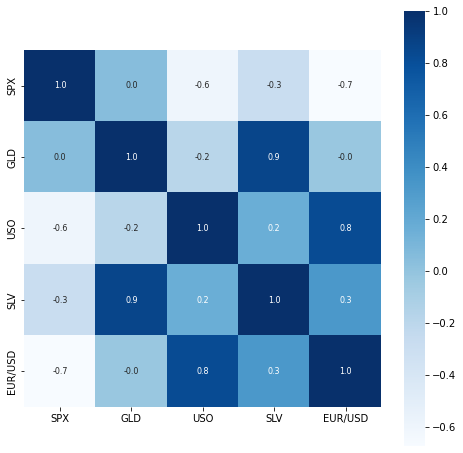

In [6]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [7]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


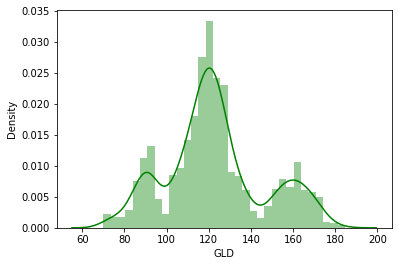

In [8]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [9]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [11]:
#Model Training: Random Forest Regressor

regressor = RandomForestRegressor(n_estimators=100)

# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [12]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

print(test_data_prediction)

# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

[168.12409901  81.93859988 115.96730042 127.70890036 120.66530138
 154.79239774 150.33339885 126.09930053 117.5711987  126.02300055
 116.64760123 171.2924008  141.84879902 167.81779844 115.3573999
 117.69440054 139.537903   169.99030066 158.58940286 159.67209967
 155.06080012 125.03300002 176.02230004 157.76270298 125.13970062
  93.76699967  77.82870003 120.4774     119.12269967 167.45729921
  88.23060045 125.00499971  91.07270091 117.71980014 121.12369903
 136.51520131 115.54960158 114.99710095 147.56209979 107.01840097
 104.28460223  87.22279781 126.53300041 118.01999985 152.99459903
 119.69020003 108.42980046 107.99219808  93.07850047 126.98769813
  74.78970038 113.66189921 121.35070035 111.32309906 118.95759889
 121.34849937 158.69869991 168.3955011  146.8212967   85.8074988
  94.48520003  86.73969906  90.44199996 118.9330008  126.40080052
 127.73010053 169.51599958 122.15639931 117.55769893  98.68400025
 167.84970084 143.08699838 131.85340328 121.11230219 120.7732996
 119.83610046

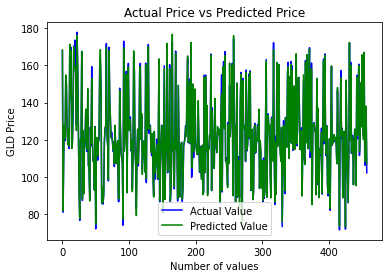

In [13]:
#Compare the Actual Values and Predicted Values in a Plot

Y_test = list(Y_test)

plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()